# collect all data and put them in a single dataframe

In [64]:
import os
import pandas as pd

results_path = "/home/boonstra/xin_results_19_3"

data_frames = []
for filename in os.listdir(results_path):
    seed, extension = os.path.splitext(filename)
    if extension.lower() != ".csv":
        continue
    filepath = os.path.join(results_path, filename)
    df = pd.read_csv(filepath, header=0)
    df["seed"] = seed
    data_frames.append(df)

all_data = pd.concat(data_frames)
all_data.index = range(len(all_data))
all_data

,task,human_error_occured,error_discovered,error_corrected,scenario,complexity_level,error_magnitude,hep,bendingMomentULS,total,...,F6_multiplier,F7_multiplier,F8_multiplier,F9_multiplier,F10_multiplier,F11_multiplier,F12_multiplier,F13_multiplier,F14_multiplier,seed
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001577,0.001577,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,D1,False,False,False,NaN,moderate,NaN,0.788063,0.001577,0.001577,...,1.000000,NaN,1.000000,1.584894,78.806274,1.000000,45.838881,NaN,NaN,14
2,D3,True,False,False,D3-S1,moderate,0.849724,4.189143,0.000542,0.000542,...,8.078975,NaN,3.175421,11.659148,139.638110,54.027597,61.372359,NaN,NaN,14
3,D7,True,True,True,NaN,nominal,NaN,2.314498,0.000542,0.000542,...,27.802458,NaN,19.655198,11.982307,125.447772,16.329097,NaN,NaN,NaN,14
4,D10,True,True,True,NaN,nominal,NaN,3.868448,0.000542,0.000542,...,1.000000,NaN,2.956151,12.394215,128.948250,1.000000,1.000000,NaN,NaN,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,C4,False,False,False,NaN,nominal,NaN,0.327541,0.375269,0.375269,...,25.000102,NaN,3.520671,NaN,22.425517,NaN,NaN,17.645872,45.390924,208
15416,C5,False,False,False,NaN,nominal,NaN,0.020700,0.375269,0.375269,...,NaN,NaN,18.993863,NaN,120.347448,NaN,NaN,1.000000,1.608538,208
15417,C6,False,False,False,NaN,moderate,NaN,0.014939,0.375269,0.375269,...,NaN,NaN,1.025958,NaN,45.308609,NaN,NaN,76.008119,2.666659,208
15418,C7,False,False,False,NaN,moderate,NaN,0.533468,0.375269,0.375269,...,48.091798,NaN,1.035628,NaN,6.425214,NaN,NaN,3.269246,1.000000,208


In [65]:
import numpy as np
final_task_data = all_data[all_data["task"] == "C8"]



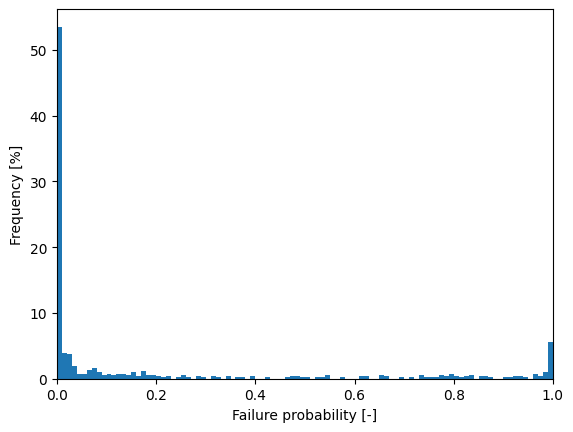

In [66]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(final_task_data["total"], bins=100, density=True)
plt.xlim(min(final_task_data["total"]), max(final_task_data["total"]))
plt.xlabel("Failure probability [-]")
plt.ylabel("Frequency [%]") 

plt.show()